In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import  make_blobs
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

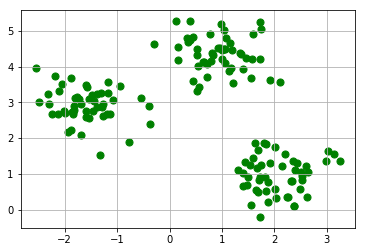

In [3]:
plt.scatter(X[:,0],X[:,1],c='green',marker='o',s=50)
plt.grid()
plt.show()

In [4]:
km = KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

上述代码中，设定簇数量为3；指定先验的簇数量是k-means算法的一个缺陷，设置n_init=10,程序能够基于不同的随机初始化中心点独立运行算法10次，并从中选择SSE最小的作为最终模型。

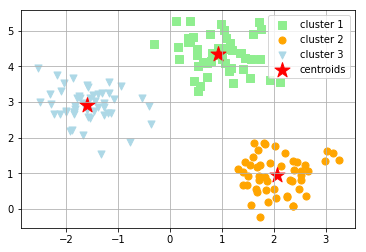

In [5]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='v',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',label='centroids')
plt.legend()
plt.grid()
plt.show()

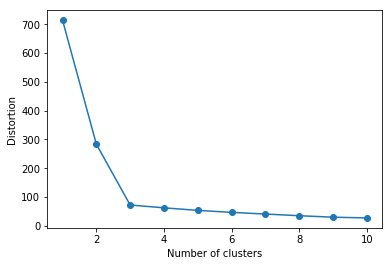

In [6]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

In [9]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')

In [11]:
n_clusters

3

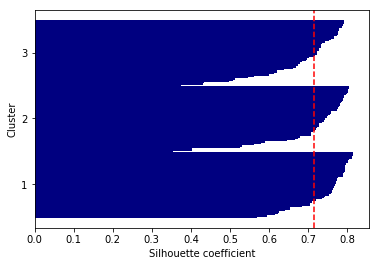

In [10]:
y_ax_lower,y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color='red',
           linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

**为了评判聚类效果的优劣，在途中增加了轮廓系数的平均线。下面为了了解聚类效果不佳的轮廓图的形状，我们使用两个中心点来初始化k-means算法**

In [20]:
km = KMeans(n_clusters=2, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)

In [21]:
y_km = km.fit_predict(X)

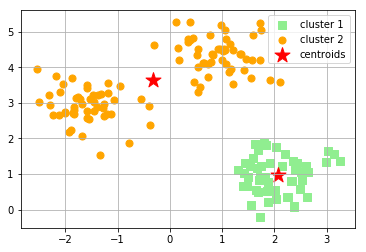

In [22]:
plt.scatter(X[y_km==0,0],
           X[y_km==0,1],
           s=50, c='lightgreen',
           marker='s',
           label='cluster 1')

plt.scatter(X[y_km==1,0],
           X[y_km==1,1],
           s=50,
           c='orange',
           marker='o',
           label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250,
           marker='*',
           c='red',
           label='centroids')
plt.legend()
plt.grid()
plt.show()

**接下来，我们绘制轮廓图对聚类结果进行评估。**

In [29]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')

In [30]:
y_ax_lower,y_ax_upper = 0,0

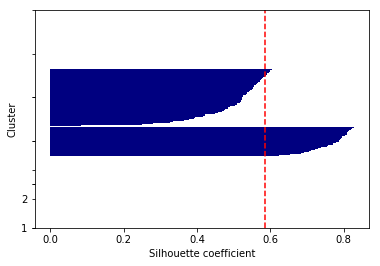

In [32]:
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

**如何计算凝聚层次聚类算法中，距离矩阵如何计算**

In [34]:
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10

In [35]:
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [37]:
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels,index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


**上述代码中，基于样本的特征X、Y、Z，使用欧几里德距离计算样本间的两两距离。通过squareform函数，得到一个记录成对样本间距离的对称矩阵** <br>
**下面，我们使用scipy中cluster.hierarchy子模块下的linkage函数，此函数以全连接作为距离判定标准，返回一个所谓的关联矩阵(linkage matrix)**

In [39]:
row_clusters = linkage(df.values, method='complete',metric='euclidean')

In [40]:
pd.DataFrame(row_clusters,columns=['row label 1','row label 2','distance','no. of items in clust.'],
            index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


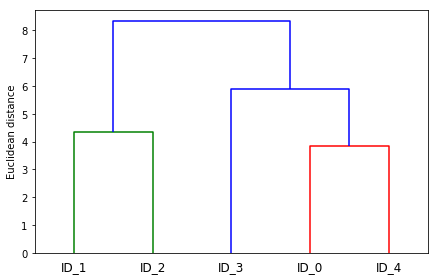

In [44]:
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**ID_0和ID_4合并，接下来是ID_1和ID_2合并，也就是基于欧几里得距离矩阵，选择最不相似的样本进行合并**

### 树状图与热度图的关联

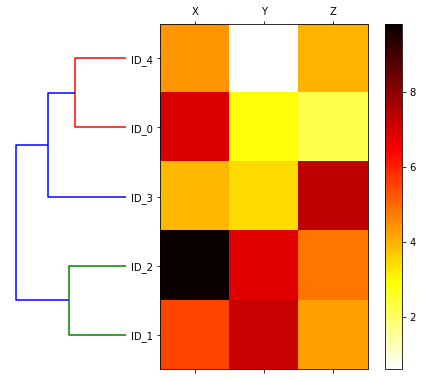

In [52]:
#创建一个figure对象，并通过add_axes属性来设定x轴位置、y轴位置，以及树状图的宽度和高度
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left') 
#接下来，我们根据树状图对象中的簇类标重排初始化数据框(DataFrame)对象中的数据
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
#基于重排后的数据框(DataFrame)数据，在树状图的右侧绘制热度图
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest',cmap='hot_r')
#最后，为了美化效果，我们删除了坐标轴标记，并将坐标轴的刻度隐藏
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
    
fig.colorbar(cax)
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))
plt.show()

### 使用sklearn进行凝聚聚类

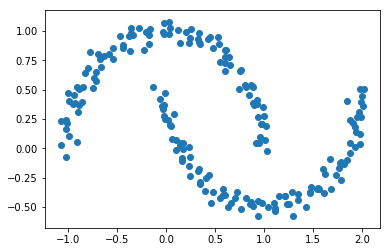

In [54]:
X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

**以下基于k-means算法和基于全连接的层次聚类算法**

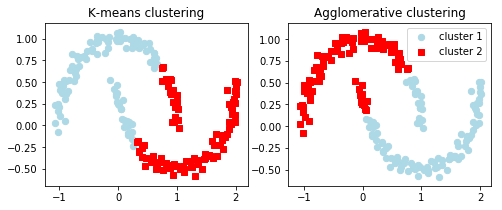

In [59]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c='lightblue',marker='o',s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red',marker='s',s=40,label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c='lightblue', marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red',marker='s',s=40,label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

**以下使用DBSCAN算法，发现两个半月形的簇**

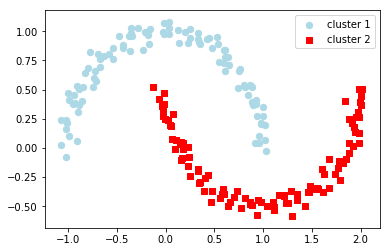

In [62]:
db = DBSCAN(eps=0.2,
           min_samples=5,
           metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
           X[y_db==0,1],
           c='lightblue',
           marker='o',
           s=40,
           label='cluster 1')
plt.scatter(X[y_db==1,0],
           X[y_db==1,1],
           c='red',
           marker='s',
           s=40,
           label='cluster 2')
plt.legend()
plt.show()